## 票房信息

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 


#### 1.导入并检查数据

In [3]:
# 读入数据
salary_df = pd.read_excel("movies.xlsx", sheet_name=1)
# 检查信息导入
salary_df.head()


,电影ID,票房地区,货币单位,上映周次,上映时间段,场均人次(人),单周票房(万),累计票房(万)
0,1007,香港票房,港币,第6周,2003年 10月30日-11月05日,10.0,23,2491
1,1007,香港票房,港币,第5周,2003年 10月23日-10月29日,8.0,53,2468
2,1007,香港票房,港币,第4周,2003年 10月16日-10月22日,4.0,199,2414
3,1007,香港票房,港币,第3周,2003年 10月09日-10月15日,1.0,530,2214
4,1007,香港票房,港币,第1周,2003年 09月25日-10月01日,2.0,527,527


#### 2.重命名列名

In [4]:
salary_df.columns = ['id', 'region', 'currency', 'week', 'date_gap', 'avg_audience', 'week_salary', 'accum_salary']
print(salary_df.columns)

Index(['id', 'region', 'currency', 'week', 'date_gap', 'avg_audience',
       'week_salary', 'accum_salary'],
      dtype='object')


#### 3. 检查空值并填充

In [5]:
salary_df['avg_audience'] = salary_df['avg_audience'].apply(lambda x:None if x=='N/A' else x)

#### 4.描述性统计与相关性计算

In [6]:
#描述性统计
print("-"*50)
print("描述性统计")
print(salary_df.describe())
#相关性
df_show = salary_df[['avg_audience','week_salary','accum_salary']]
print("-"*50)
print("相关性")
print(df_show.corr(method="pearson"))

--------------------------------------------------
描述性统计
                  id  avg_audience   week_salary   accum_salary
count    1724.000000   1605.000000   1724.000000    1724.000000
mean   134840.483759     25.934579    593.680974    6640.023782
std    151635.435331     33.324054   2284.262217   14540.962289
min        14.000000      0.000000      0.000000       0.000000
25%      1320.000000      5.000000      5.000000     155.000000
50%      2405.000000     12.000000     52.000000    1274.500000
75%    303851.000000     36.000000    340.000000    6100.500000
max    317408.000000    370.000000  43615.000000  132578.000000
--------------------------------------------------
相关性
              avg_audience  week_salary  accum_salary
avg_audience      1.000000     0.021540     -0.040694
week_salary       0.021540     1.000000      0.340775
accum_salary     -0.040694     0.340775      1.000000


#### 5.平均内地票房

In [7]:
mainland_salary_df = salary_df[salary_df['region'] == "内地票房"]
mainland_salary_df['week_salary'].mean()

1104.4635879218472

#### 6.累计票房散点图

In [8]:
#读取movies_df
movies_df = pd.read_excel("movies.xlsx", sheet_name = 0)

In [34]:
salary_df['id'] = salary_df['id'].astype(int)
salary_df['accum_salary'] = salary_df['accum_salary'].astype(int)

#统一为rmb
def extract(row):
    HKD = 1.14
    USD = 6.90
    if row['region'] == '香港票房':
        return row['accum_salary'] * HKD
    elif row['region'] == '北美票房':
        return row['accum_salary'] * USD
    else:
        return row['accum_salary']
    
salary_df['accum_salary_cny'] = salary_df.apply(extract, axis = 1)
salary_df.head()


,id,region,currency,week,date_gap,avg_audience,week_salary,accum_salary,accum_salary_cny
0,1007,香港票房,港币,第6周,2003年 10月30日-11月05日,10.0,23,2491,2839.74
1,1007,香港票房,港币,第5周,2003年 10月23日-10月29日,8.0,53,2468,2813.52
2,1007,香港票房,港币,第4周,2003年 10月16日-10月22日,4.0,199,2414,2751.96
3,1007,香港票房,港币,第3周,2003年 10月09日-10月15日,1.0,530,2214,2523.96
4,1007,香港票房,港币,第1周,2003年 09月25日-10月01日,2.0,527,527,600.78


In [58]:

#保留累计票房最大值
accum_salary_df = salary_df.groupby('id').agg({'accum_salary_cny':max})
accum_salary_df.head()
accum_salary = list(accum_salary_df['accum_salary_cny'])
ids = list(accum_salary_df.index)
#怕salary和times对不上
id_salary = {id:salary for (id,salary) in zip(ids, accum_salary)}

C:\Users\Huawei\AppData\Local\Temp\ipykernel_18892\1483136570.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  accum_salary_df = salary_df.groupby('id').agg({'accum_salary_cny':max})


In [61]:

#在表一中找到对应片长
ids_df = movies_df[movies_df['电影ID'].isin(ids)]
#用正则表达式提取片长中的数字
ids_df['片长'] =ids_df['片长'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x))[0] if re.findall(r'\d+\.?\d*', str(x)) else None)
ids_df.head()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_18892\1781089837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids_df['片长'] =ids_df['片长'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x))[0] if re.findall(r'\d+\.?\d*', str(x)) else None)


,电影ID,电影名,上映年度,电影英文名,类型,片长,上映时间,制式,国家及地区,累计票房,发行公司,导演,主演,制片公司列表,发行公司列表
1,1007,无间道2,2003,Mou gaan dou II,警匪/动作,119,2003-9-5（中国）,2D,中国香港/中国/新加坡,800.8万,"寰亚影视发行（香港）有限公司,","刘伟强 Andrew Lau,","黄秋生 Anthony Wong,曾志伟 Eric Tsang,刘嘉玲 Carina Lau...","寰亚电影制作有限公司 Media Asia Film Production Co., Ltd...","A,Bright Angel Distribution,Cinema Mondo,Comst..."
2,1008,无间道3,2003,Mou gaan dou III: Jung gik mou gaan,警匪,118,2003-12-11（中国）,2D,中国香港/中国,3601.0万,"寰亚影视发行（香港）有限公司,","刘伟强 Andrew Lau,麦兆辉 Alan Mak,","梁朝伟 Tony Leung,刘德华 Andy Lau,黎明 Leon Lai,陈道明 Da...","寰亚电影制作有限公司 Media Asia Film Production Co., Ltd...","A,Bright Angel Distribution,Cinema Mondo,Comst..."
3,1016,墨攻,2006,Muk gong,战争,133,2006-11-23（中国）,2D,中国/日本/韩国/中国香港,6701.8万,"安乐影片有限公司,","张之亮 Jacob Cheung,","刘德华 Andy Lau,安圣基 Seong,王志文 Zhiwen Wang,范冰冰 Bin...","Boram Entertainment Inc.,Comstock,Hark &#38; C...","Amuse Soft Entertainment,Comstock,Deltamac Ent..."
6,1020,蓝莓之夜,2007,My Blueberry Nights,爱情/公路,90,2007-12-22（中国）,2D,中国香港/中国/法国,1207.4万,"美国环球影业公司,","王家卫 Kar Wai Wong,","裘德·洛 Jude Law,诺拉·琼斯 Norah Jones,弗兰基·费森 Frankie...","Block 2 Pictures,泽东电影公司 Jet Tone Production Co...","Frenetic Films,美国环球影业公司 Universal Pictures (Un..."
8,1027,男儿本色,2007,Naam yi boon sik,警匪,128,2007-7-19（中国）,2D,中国香港/中国,3408.7万,"寰宇影片发行有限公司,","陈木胜 Benny Chan,","谢霆锋 Nicholas Tse,房祖名 Jaycee Chan,余文乐 Shawn Yue...","Universe Films Ltd.,银都机构有限公司 Sil,广东英明文化传播有限公司 ...","寰宇影片发行有限公司 Universe Films Distribution Co.,Ltd..."


In [ ]:
#提取times
id_time = ids_df.set_index('电影ID')['片长'].to_dict()

times = [id_time.get(movie_id, 0) if pd.notna(id_time.get(movie_id)) else 0 for movie_id in ids]
print(id_time)
print(times)
#id/time/salary一一对应

{1007: '119', 1008: '118', 1016: '133', 1020: '90', 1027: '128', 1029: None, 1037: '132', 1042: '120', 1088: '109', 1092: '125', 1098: '116', 1108: '108', 112: '91', 1123: '95', 1125: '107', 1208: '107', 1227: '102', 1233: '118', 1242: '118', 1245: '111', 1247: '157', 1262: '116', 1276: '90', 1283: None, 131: '100', 1320: '119', 1327: '140', 1338: None, 1363: '100', 1367: '93', 1380: '107', 1396: '116', 14: None, 1413: '95', 1414: '126', 1420: None, 1424: '114', 1435: '95', 1437: '113', 1439: '104', 1446: '101', 1464: '89', 1466: '102', 1474: '86', 1491: '103', 1495: None, 1527: '135', 1532: '89', 1536: '120', 1558: '128', 1617: '129', 1629: '116', 164: '115', 1659: '123', 1674: '91', 1679: '102', 169: '153', 1714: '98', 1754: '95', 1771: '131', 1774: '88', 1813: '95', 1818: '99', 1827: '110', 183: '102', 184: '150', 185: '114', 1870: '117', 188: '103', 1922: '129', 1992: None, 21: '96', 2215: '134', 2238: '93', 2270: '101', 2310: '109', 2348: '83', 2373: '91', 2405: '86', 2428: '111',

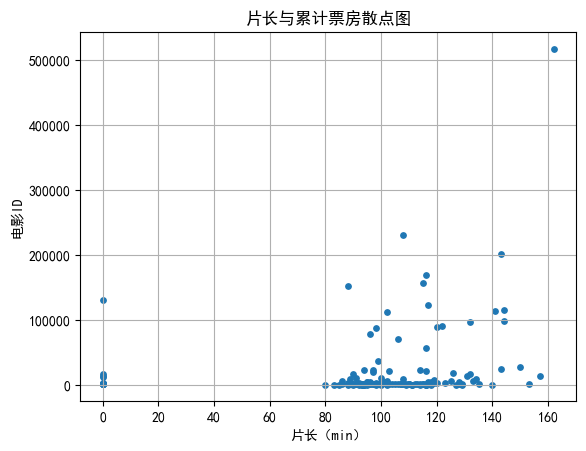

In [79]:
plt.scatter(times, accum_salary, s = 15)
plt.grid()
plt.xlabel('片长（min）')
plt.ylabel('电影ID')
plt.title('片长与累计票房散点图')
plt.show()